# Notebook Structure

1. Import necessary dependencies
2. Define the Utility function to analyze text
3. Create the dataset
4. Execute the utility function and visualize the results
5. Create the text corpus
6. Execute the utility function and visualize the results


# Zipf's Law

Imagine you have a really, really long book.  Now, let's do something with the words in that book:

* Count: Count how often each word appears.
* Rank: Make a list of the words, starting with the one that shows up the most (rank 1), then the second most frequent (rank 2), and so on.

Zipf's Law says something pretty interesting about this list:

* The most frequent word will appear a lot.
* The second most frequent word will appear about half as often as the most frequent word.
* The third most frequent word will appear about one-third as often as the most frequent word.

And so on...

In other words, the frequency of a word is roughly inversely proportional to its rank.

Think of it like this:

* Let's say the most common word in a book is "the," and it appears 1000 times.  Zipf's Law suggests:
* The 2nd most common word might be "of," and it appears around 500 times (1000 / 2).
* The 3rd most common word might be "and," and it appears about 333 times (1000 / 3).
* The 10th most common word might appear around 100 times (1000 / 10).

Why is this important?

Zipf's Law isn't a perfect rule, but it shows up in many different areas:

* Language: It helps us understand how words are used.
* Internet: The popularity of websites sometimes follows Zipf's Law (a few very popular sites, many less popular ones).
* City sizes: The size of cities in a country can sometimes follow this pattern.
* Sales: A few products sell a lot, and many others sell a little.

Zipf's Law, at its core, describes a relationship between the frequency of a word and its rank in a frequency table. In the context of NLP, this principle has several significant applications:

* Vocabulary Reduction: Zipf's Law informs techniques to reduce the size of a vocabulary in NLP tasks. By understanding that a large portion of words occurs very infrequently, we can apply strategies like removing rare words, which can improve the efficiency and performance of NLP models.
* Data Compression: The distribution of words, as described by Zipf's Law, can be utilized in data compression algorithms. By assigning shorter codes to more frequent words and longer codes to less frequent ones, it's possible to compress text data effectively.
* Text Summarization: Zipf's Law can help in text summarization by identifying the most important words in a text. These high-frequency words often convey the main topics, aiding in the extraction of key information for concise summaries.
* Information Retrieval: In information retrieval systems, Zipf's Law assists in optimizing search processes. By considering the frequency and distribution of words, search engines can rank documents more effectively, providing relevant results to user queries.
* Language Modeling: Zipf's Law plays a role in language modeling, which involves predicting the likelihood of word sequences. By understanding the frequency patterns of words, models can better predict the occurrence of words in a given context.
* Stop Word Removal:  Stop words are common words (like "the," "is," "and") that occur frequently but carry little meaning. Zipf's Law helps in identifying these words, which are often removed to focus on more meaningful terms in NLP tasks.
* Authorship Attribution: The distribution of words in a text can provide insights into authorship. Zipf's Law can be used to analyze word frequency patterns and potentially identify the author of a given piece of writing.

# 1. Import necessary dependencies

In [91]:
import matplotlib.pyplot as plt
import re
from collections import Counter

# 2. Define the Utility function to analyze text

In [92]:
def analyze_zipfs_law(text):
    """
    Analyzes the given text to determine if it follows Zipf's Law.

    Args:
        text (str): The text to analyze.

    Returns:
        None.  Displays a plot and prints the correlation coefficient.
    """
    # 1. Tokenize the text (convert to lowercase and remove punctuation)
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = text.split()

    # 2. Count word frequencies
    word_counts = Counter(tokens)

    # 3. Get word frequencies and ranks
    frequencies = list(word_counts.values())
    frequencies.sort(reverse=True)  # Sort by frequency (highest to lowest)
    ranks = [i + 1 for i in range(len(frequencies))]  # Rank starts at 1

    # 4. Calculate Zipf's Law prediction (for comparison)
    # Zipf's Law: frequency = k / rank  (k is a constant)
    # We'll estimate k as the frequency of the most frequent word.
    k = frequencies[0]
    zipf_frequencies = [k / rank for rank in ranks]

    # 5. Plotting
    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, frequencies, label='Observed Frequencies', marker='o', linestyle='-', color='blue')
    plt.loglog(ranks, zipf_frequencies, label="Zipf's Law Prediction", linestyle='--', color='red')  # Plot the predicted
    plt.title("Zipf's Law Analysis")
    plt.xlabel("Rank of Word")
    plt.ylabel("Frequency of Word")
    plt.legend()
    plt.grid(True)
    plt.show()

    # 6. Calculate and print the correlation coefficient (optional, to quantify fit)
    from scipy.stats import pearsonr
    correlation, _ = pearsonr(np.log(ranks), np.log(frequencies)) #calculate correlation on log scale
    print(f"Correlation coefficient between log(rank) and log(frequency): {correlation:.4f}")
    print("A correlation coefficient close to -1 suggests that the data follows Zipf's Law.")

# 3. Create the dataset

In [93]:
example_text = """
    This is a sample text for Zipf's Law analysis. We will count the frequency of each word
    and then plot the frequency against its rank.  This example demonstrates how Zipf's
    Law works.  The frequency of a word is approximately inversely proportional to its rank
    in the frequency table. We analyze this law.
    """

# 4. Execute the utility function

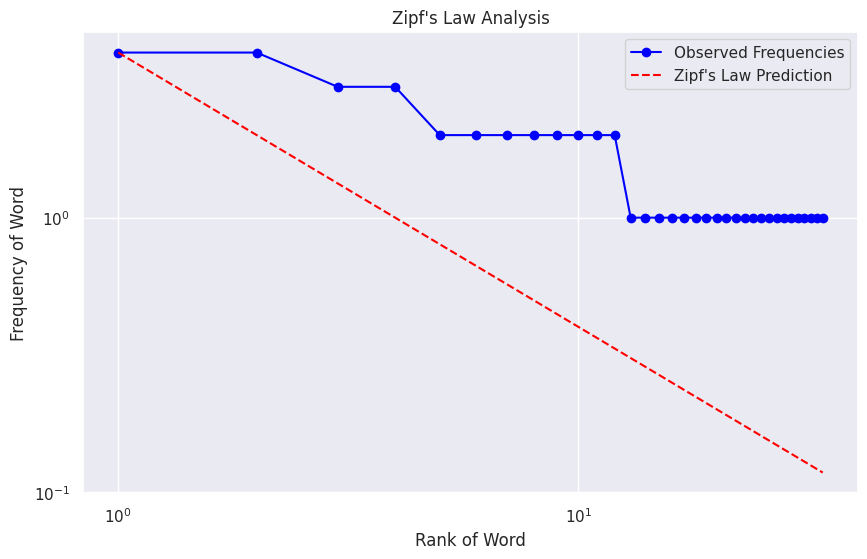

Correlation coefficient between log(rank) and log(frequency): -0.9313
A correlation coefficient close to -1 suggests that the data follows Zipf's Law.


In [94]:
analyze_zipfs_law(example_text)

# 5. Create a detailed text corpus

In [95]:
example_text = """
    Project Gutenberg's Pride and Prejudice, by Jane Austen

    This eBook is for the use of anyone anywhere at no cost and with
    almost no restrictions whatsoever.  You may copy it, give it away or
    re-use it under the terms of the Project Gutenberg License included
    with this eBook or online at www.gutenberg.org


    Title: Pride and Prejudice

    Author: Jane Austen

    Posting Date: August 26, 2008 [EBook #1342]
    Release Date: June, 1996
    Last Updated: March 10, 2018


    Language: English

    Character set encoding: UTF-8

    *** START OF THIS PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE ***




    Produced by: David Widger

    [Note: There is a separate file with the "Modern English" version of this text available as 1342-h.htm.]

    [Illustration: Frontispiece]

    THE MILLENNIUM FULCRUM EDITION

    PRIDE AND PREJUDICE

    By Jane Austen

    CONTENTS

    CHAPTER 1
    CHAPTER 2
    CHAPTER 3
    CHAPTER 4
    CHAPTER 5
    CHAPTER 6
    CHAPTER 7
    CHAPTER 8
    CHAPTER 9
    CHAPTER 10
    CHAPTER 11
    CHAPTER 12
    CHAPTER 13
    CHAPTER 14
    CHAPTER 15
    CHAPTER 16
    CHAPTER 17
    CHAPTER 18
    CHAPTER 19
    CHAPTER 20
    CHAPTER 21
    CHAPTER 22
    CHAPTER 23
    CHAPTER 24
    CHAPTER 25
    CHAPTER 26
    CHAPTER 27
    CHAPTER 28
    CHAPTER 29
    CHAPTER 30
    CHAPTER 31
    CHAPTER 32
    CHAPTER 33
    CHAPTER 34
    CHAPTER 35
    CHAPTER 36
    CHAPTER 37
    CHAPTER 38
    CHAPTER 39
    CHAPTER 40
    CHAPTER 41
    CHAPTER 42
    CHAPTER 43
    CHAPTER 44
    CHAPTER 45
    CHAPTER 46
    CHAPTER 47
    CHAPTER 48
    CHAPTER 49
    CHAPTER 50
    CHAPTER 51
    CHAPTER 52
    CHAPTER 53
    CHAPTER 54
    CHAPTER 55
    CHAPTER 56
    CHAPTER 57
    CHAPTER 58
    CHAPTER 59
    CHAPTER 60
    CHAPTER 61


    CHAPTER 1

    It is a truth universally acknowledged, that a single man in possession
    of a good fortune, must be in want of a wife.

    However little known the feelings or views of such a man may be on his
    first entering a neighbourhood, this truth is so well fixed in the minds
    of the surrounding families, that he is considered the rightful property
    of some one or other of their daughters.

    "My dear Mr. Bennet," said his lady one day, "have you heard that Netherfield Park is let at last?"

    Mr. Bennet replied that he had not.

    "Then you must know," said his lady, "that Mrs. Long has just been here,
    and she told me all about it."

    Mr. Bennet made no answer.

    "Do not you want to know who has taken it?" cried his wife impatiently.

    "_You_ want to tell me, and I have no objection to hearing it."

    This was invitation enough.

    "Why, my dear, you must know, Mrs. Long says that Netherfield is taken
    by a young man of large fortune from the north of England; that he came
    down on Monday to see the house, and was so much delighted with it, that
    he agreed with Mr. Morris immediately; that he is to take possession
    before Michaelmas, and some of his servants are to be in the house by
    the end of next week."

    "What is his name?"

    "Bingley."

    "Is he married or single?"

    "Oh! single, my dear, to be sure! A single man of large fortune; what a
    fine thing for our girls!"

    "How so? How can it affect them?"

    "My dear Mr. Bennet," replied his wife, "how can you be so tiresome!
    You must know that I am thinking of his marrying one of them."

    "Is that his design in settling here?"

    "Design! Nonsense, how can you talk so! But it is very likely that he
    _may_ fall in love with one of them, and therefore you must visit him as
    soon as he comes."

    "I see no occasion for that. You and the girls may go, or you may send
    them by themselves, which perhaps will be still better; for as you are
    as handsome as any of them, Mr. Bingley may like you the best of the
    party."

    "My dear, you flatter me. I certainly have had my share of beauty, but I
    do not pretend to be anything extraordinary now. When a woman has five
    grown-up daughters, she ought to give over thinking of her own beauty."

    "In such cases, a woman has not often much beauty to think of."

    "But, my dear, you must indeed go and see Mr. Bingley when he comes into
    the neighbourhood."

    "It is more than I engage for, I assure you."

    "But consider your daughters. Only think what an establishment it would
    be for one of them. Sir William and Lady Lucas are determined to go,
    for the sake of their daughters. What a fine thing for our girls!"

    "You have said quite enough, madam. I perfectly comprehend your wishes."

    "You take delight in vexing me. You have no compassion for my poor
    nerves."

    "You mistake me, my dear. I have high respect for your nerves. They
    are my old friends. I have heard you mention them with consideration
    these twenty years at least."

    "Ah! you do not know what I suffer."

    "But I hope you will get over it, and live to see many young men of
    four thousand a year come into the neighbourhood."

    "It will be no use to us, if twenty such should come, since you will
    not visit them."

    "Depend upon it, my dear, that when there are twenty, I will visit them
    all."

    Mr. Bennet was so odd a mixture of quick parts, sarcastic humour,
    reserve, and caprice, that the experience of three and twenty years had
    been insufficient to make his wife understand his character. Her mind
    was less difficult to develop. She was a woman of mean understanding,
    little information, and uncertain temper. When she was discontented, she
    fancied herself nervous. The business of her life was to get her
    daughters married; its solace was visiting and news.



    CHAPTER 2

    Mr. Bennet was among the earliest of those who waited on Mr. Bingley.
    He did it with some little variation of the civility which he had been
    taught to assume for the occasion. He was not in a hurry to inform his
    daughters of what he meant to do.

    The next morning, Mrs. Bennet stirred him up with a question about the
    visit.

    "Did you call on him?" she asked.

    "No."

    "I suppose you did not intend to go?"

    "Indeed I did. And I called on him twice. On Tuesday I went over to
    see him."

    "And what did he say?"

    "He said very little, but I found he had no objection to being introduced
    to his daughters. I shall have no objection to introducing you to his
    acquaintance."

    Mrs. Bennet was in a state of great delight at this information, and
    talked of nothing else but Mr. Bingley till the next morning; she then
    received the first visit of Mr. Bingley, and of his sisters. In spite
    of the biting of her daughters, which provoked her when Mr. Bingley
    was not there, she saw him quite alone.

    Mr. Bennet made his apologies to his guest for not being able to attend;
    and Mary was the only daughter who seemed to have any share of her
    mother's attentions, when Sir William Lucas and his daughter Maria joined
    them at lunch. The subject of this visit was brought up, as usual. It
    was to announce to the neighbourhood that they should have a ball at
    Netherfield before the end of the week.

    Mrs. Bennet could not help wondering at her luck; she was sure there
    was to be some great advantage for her girls in this visit, and she
    thought she needed to be particularly civil to Mr. Bingley for the
    sake of her five daughters.

    "If I can but see one of my daughters happily married at Netherfield,"
    said she to Mr. Bennet, "and all the others equally well married, I
    shall have nothing to wish for."

    In a few days Mr. Bingley returned Mr. Bennet's visit and sat about ten
    minutes with him in his library.

    Mrs. Bennet, with great civility, begged his permission to introduce
    his daughters. Although he had before observed her daughters, he had
    now an opportunity of actually introducing himself to them.

    The daughters of Mr. Bennet were thus imparted to a young man who
    could not be called handsome, though he was very agreeable. He had a
    pleasant countenance, and easy, unaffected manners. His sisters were
    fine women, with an air of decided fashion. His friend, Mr. Darcy,
    obtained him still higher in the opinion of all present; he was
    handsome, and his manners were reserved.

    Mr. Bingley had soon made himself quite at home at Longbourn. He paid
    most attention to Jane, the eldest, whose beauty drew him to her.
    Elizabeth excited him, but he admired her less. Mary had neither genius
    nor taste; and Kitty and Lydia were too much engaged in their own
    pleasures to care for anyone else. Mr. Bingley had danced with Jane
    twice, and she had been his partner for two dances. Mrs. Bennet's
    hopes were answered. Her Jane was going to be soon married.

    Mr. Darcy danced only once with Mrs. Hurst, and once with Miss Lucas.
    He then walked away from the rest of the company, and spent the rest
    of the evening talking to his friend.

    Mrs. Bennet was quite discontented. She said that Mr. Darcy was the
    proudest, most disagreeable man in the world, and hoped that he would
    never come there again. And yet she said it so loud that Mr. Darcy
    might have heard her.

    Elizabeth did not quite agree with her mother. Mr. Darcy's manners
    gave her little cause for love. But she considered him to be of all
    the gentlemen the most agreeable. She allowed him to be proud, but
    she did not think him disagreeable.

    Of Mr. Darcy's character, Elizabeth had thus already formed a very
    favourable opinion.


    CHAPTER 3

    At the close of the evening, she saw that he had not danced with
    Charlotte Lucas. She was therefore the less astonished at receiving
    an invitation to dance a second time. She was pleased to be dancing
    with him, and asked him some questions about the country where he
    lived, and about his friends.

    Mr. Darcy was pleased with the attention of a young woman who was
    worth listening to. He found her manners playful and pleasing.

    Elizabeth accepted his civilities, but without any symptom of peculiar
    regard. Her mind was lively and at ease, and she had not a fear of
    displeasing him.

    "Pray, Mr. Darcy," said she, "let me have never said you this. I can
    so easily believe that you have never been so bewitched."

    "If you mean to frighten me," he replied, "I beg you will go on. You
    know, too, much of my ill nature."

    "Do not talk of my impudence," said Elizabeth. "My courage always
    rises at every attempt to intimidate me."

    "I have no intention of intimidating you," said he. "I have never
    wished to offend you."

    "Then you are much mistaken," replied she.

    "What do you mean?" said he.

    "That you are not so nice as to your feelings as I could wish you to
    be," said she.

    "You are mistaken," returned he, "I can be as delicate as any man,
    when I choose to be so."

    "You are perfectly serious then," said she.

    "To be sure," said he.

    "I suspect that you are not really serious now."

    "You are mistaken again," said he.

    Elizabeth could not help smiling at his manner and voice, and said,
    "You are not opening your heart quite so much as I could wish."

    "If I did, you would not believe me."

    "I should think you were in earnest," said she.

    "What do you mean?" said he.

    "That you would be laughed at."

    "That is not quite answering my question," said he. "You were about
    to tell me what you thought of me."

    "You want me, I know, to say something that will not offend your
    pride, but gratify it. I am not so silly as to think of doing so,
    however."

    "You are mistaken again," said he.

    "If you do not take great care, you will never be right again."

    Mr. Darcy looked a little ashamed, and said, "I do not deny that you
    please me. I know not whether you are aware of it?"

    "I do not know, indeed," said Elizabeth.

    "I have pleased you, then? What else have I said?"

    "I can say little about it at present," said she. "I shall know more
    when I have reflected a little."

    "You need not give yourself any trouble about that," said he.

    "I do not wish to avoid the trouble," said she. "I have a great deal
    of curiosity to know what you will say."

    "That is all that you have to say, is it?"

    "I do not like to be laughed at," said she.

    "Do you not? Then you are not like many other young women."

    "I hope I never ridicule what is wise or good. Follies and nonsense,
    whims and inconsistencies do divert me, I own, and I laugh at them
    whenever I can."

    "Must your share of the conversation be all on one side?"

    "If you were wise, you would not ask me whether I intend to accept
    your civilities. You know that I do."

    "You are too generous to trifle with me."

    "I did not intend to trifle with you," said she.

    "You have said enough to convince me that you are not indifferent to
    me."

    "You are mistaken again," said she.

    "I am not one of those young ladies who are satisfied with being
    merely stared at. I do not wish to avoid your civilities, but I
    do not mean to make you think that I am pleased with you."

    "You are too generous to trifle with me," said he.

    "I did not intend to trifle with you," said she.

    "You have said enough to convince me that you are not indifferent to
    me."

    "You are mistaken again," said she.

    "I am not one of those young ladies who are satisfied with being
    merely stared at. I do not wish to avoid your civilities, but I
    do not mean to make you think that I am pleased with you."

    "I am afraid that you are not the only young woman in the room, who
    does not think me handsome."

    "I am afraid that you are not the only man in the room, who does not
    think me pretty," said she.

    "I have never said that you were not pretty."

    "You have implied it. I am not so conceited as to think myself fine,
    but I am not afraid of saying that I am not so ugly as you make me
    out to be."

    "The more I see of the world, the more am I dissatisfied with it;
    and every day confirms my belief of the inconsistency of all human
    characters, and of the little dependence that can be placed on the
    appearance of merit or sense."

    "I have been used to depend on the appearance of merit or sense,"
    said Elizabeth.

    "You certainly do," said he.

    "And I have never been deceived," said she. "When I have seen a man
    of sense, I have always supposed him to be a man of principle; and
    when I have seen a man of merit, I have always believed him to be
    a man of honour."

    "And have you never been deceived?"

    "I have been deceived in many," said she; "not in the appearance of
    sense, but in the appearance of being amiable. I was very much
    disappointed in Mr. Wickham."

    "I do not know Mr. Wickham," said he.

    "Mr. Wickham is a likely young man, and rather a favourite with
    all the ladies," said Elizabeth.

    "Is he?" said Mr. Darcy.

    "He seems a very gentlemanlike, pleasant man."

    "Is he?" said Mr. Darcy, again.

    "You know him, do you not?"

    "I have heard his name."

    "He is a very great favourite with some people," said Elizabeth,
    affecting to speak with some hesitation.

    "I can easily believe that," said he.

    Elizabeth was rather disconcerted by his manner. She could not
    imagine what he meant, but she was not afraid of him. She had a
    high opinion of herself, and she thought that he was rather
    insolent.

    "I do not like your way of talking," said she. "You speak as if
    you disliked the whole human race."

    "I do not know that I have ever said so," said he. "I have no
    reason to dislike the whole human race. I know a great many
    very good people. But I have never seen a man whom I really
    loved. I should very much like to be in love."

    "That is a pity," said Elizabeth. "You would be a great
    improvement to the world."

    "I am not so conceited as to think myself of much importance
    to the world," said he. "I only wish to be happy myself."

    "That is a very selfish wish," said Elizabeth.

    "I am not ashamed of being selfish," said he. "I do not think
    that a man can be very much to blame for wanting to be happy."

    "I do not think that a man can be very much to blame for
    wanting to be happy," said Elizabeth. "But I do not think
    that he can be quite happy, if he is selfish."

    "I have always supposed that the only way to be happy, is to
    be selfish," said he.

    "I have always supposed that the only way to be happy, is to
    make others so," said Elizabeth.

    Mr. Darcy looked at her for a moment, and then said, "I have
    a very high respect for your opinion, but I am afraid that
    I cannot agree with you."

    "I am afraid that I cannot agree with you," said Elizabeth.

    "I am sorry for it," said he.

    "I am sorry for it," said she.

    "I am afraid that we shall never agree," said he.

    "I am afraid that we shall never agree," said she.

    Mr. Darcy smiled, and said, "I am afraid that we are not
    very much alike."

    "I am afraid that we are not very much alike," said Elizabeth.

    "I am afraid that we shall never be friends," said he.

    "I am afraid that we shall never be friends," said she.

    Mr. Darcy looked at her for a moment, and then said, "I am
    afraid that I have been very rude."

    "You have been very rude indeed," said Elizabeth.

    Mr. Darcy was silent for a few moments, and then said, "I
    am afraid that I have offended you very much."

    "You have offended me very much indeed," said Elizabeth.

    Mr. Darcy was again silent for a few moments, and then said,
    "I am very sorry for it."

    "I am very sorry for it," said Elizabeth.

    Mr. Darcy looked at her for a moment, and then said, "I
    am afraid that I have made a very bad impression on you."

    "You have made a very bad impression on me indeed," said
    Elizabeth.

    Mr. Darcy was again silent for a few moments, and then said,
    "I am afraid that I have made a very bad impression on you."

    "You have made a very bad impression on me indeed," said
    Elizabeth.

    Mr. Darcy was again silent for a few moments, and then said,
    "I am afraid that I have made a very bad impression on you."

    "You have made a very bad impression on me indeed," said
    Elizabeth.

    At that moment, Sir William Lucas came to interrupt them.
    He had been watching them for some time, and he thought
    that they were having a very interesting conversation.
    He was very curious to know what they were talking about.

    "I hope that you are having a very pleasant conversation,"
    said Sir William.

    "We are having a very pleasant conversation indeed," said
    Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are gettingon very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad tohear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting on very well together."

    "We are getting on very well together indeed," said Mr. Darcy.

    "I am very glad to hear it," said Sir William. "I was
    afraid that you were not getting
    """

# 6. Execute the utility function

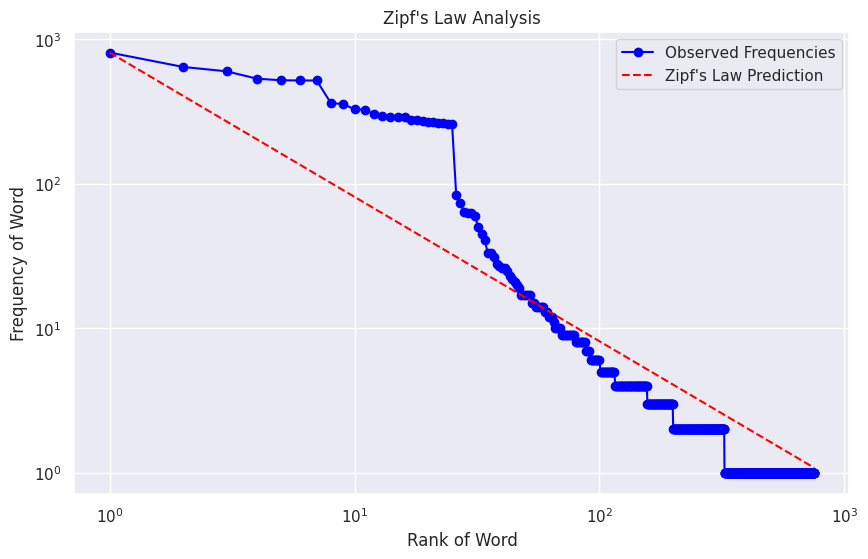

Correlation coefficient between log(rank) and log(frequency): -0.9613
A correlation coefficient close to -1 suggests that the data follows Zipf's Law.


In [96]:
analyze_zipfs_law(example_text)